In [1]:
import os
os.getcwd()

'/Users/aziz/Untitled Folder'

In [2]:
import pandas as pd
import numpy as np
import anndata as ad
import scanpy as sc
sc.settings.verbosity = 2
import matplotlib
import matplotlib.pyplot as plt
import celltypist
from celltypist import models

In [3]:
# import zipfile

# zip_path = '/Users/aziz/Untitled Folder/gaydosik_2019_filtered.zip'  # Full path to the zip file
# extract_dir = '/Users/aziz/Untitled Folder/gaydosik_2019_data'  # Destination folder to extract files

# # Extract the files
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_dir)

# print(f"Files extracted to {extract_dir}")

In [4]:
import anndata as ad
import os

data_folder = '/Users/aziz/Untitled Folder/gaydosik_2019_data/gaydosik_2019_filtered'

# List all .h5ad files in the directory
h5ad_files = [f for f in os.listdir(data_folder) if f.endswith('.h5ad')]


file_to_load = os.path.join(data_folder, 'hc3.h5ad')  # Replace 'hc3.h5ad' with the desired file
adata = ad.read_h5ad(file_to_load)

adata

AnnData object with n_obs × n_vars = 4707 × 22472
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'doublet_score', 'predicted_doublet', 'leiden', 'louvain', 'pheno_louvain', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'log1p', 'louvain', 'neighbors', 'over_clustering', 'pca', 'pheno_jaccard_q', 'predicted_labels_colors', 'rank_genes_groups', 'scrublet',

In [5]:
# # Check if 'predicted_labels' is present
# if 'predicted_labels' not in adata.obs:
#     print("The 'predicted_labels' column is not present in adata.obs.")
# else:
#     print(adata.obs['predicted_labels'].unique())


In [6]:
# # Preprocess the data
# sc.pp.neighbors(adata)  # Compute the neighborhood graph
# sc.tl.umap(adata)       # Compute the UMAP embeddings

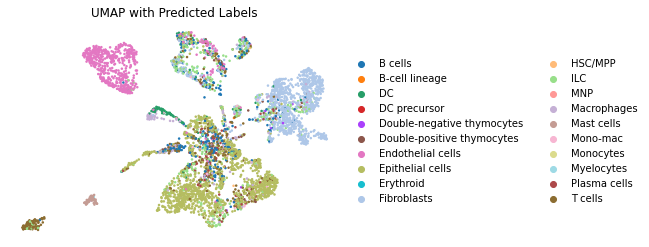

In [7]:
# Plot UMAP
sc.pl.umap(adata, color='predicted_labels', title="UMAP with Predicted Labels", frameon=False)

In [8]:
import anndata as ad
import os

# Initialize an empty dictionary to hold datasets
datasets = {}

# Iterate over all .h5ad files and load them
for file in h5ad_files:  # Use the previously defined `h5ad_files` list
    file_path = os.path.join(data_folder, file)  # Construct the full path
    datasets[file.replace('.h5ad', '')] = ad.read_h5ad(file_path)  # Store with name excluding '.h5ad'

# Print summary of datasets loaded
for key, data in datasets.items():
    print(f"{key}: {data.shape}")

hc3: (4707, 22472)
mf6: (4657, 22653)
hc2: (2162, 21175)
hc4: (3240, 22167)
mf12: (3571, 21900)
mf2: (4462, 21389)
mf5: (9187, 23354)
hc1: (3756, 21889)
mf8: (8552, 22764)


In [9]:
# Create a list of AnnData objects
dataset_list = list(datasets.values())

# # Example: Access first dataset
# print(dataset_list[0].shape)


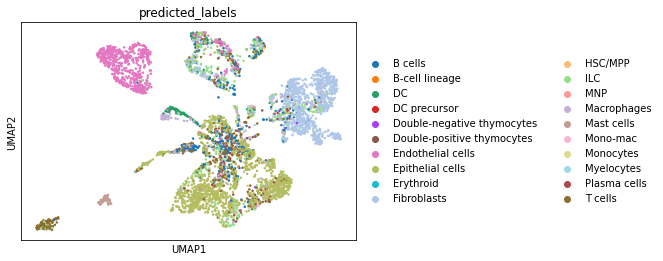

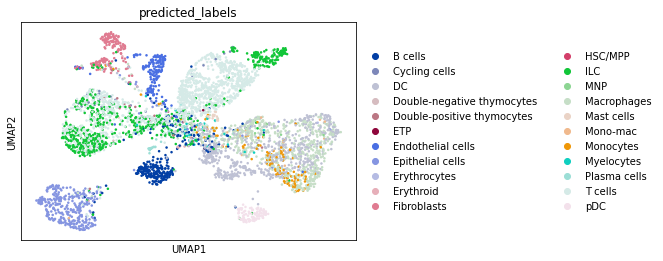

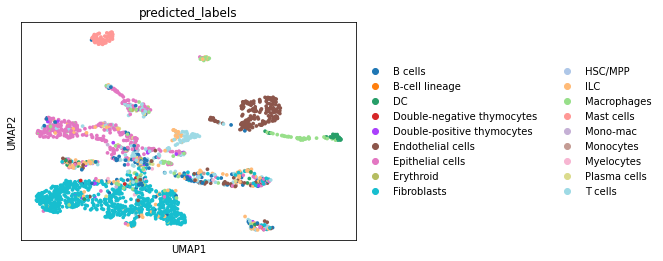

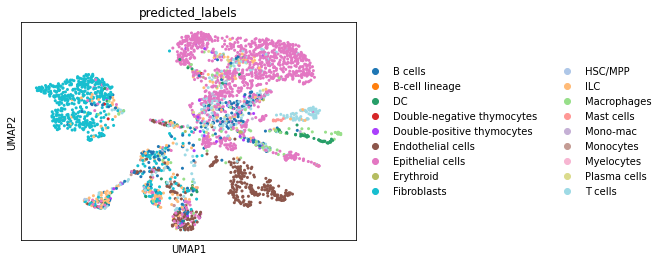

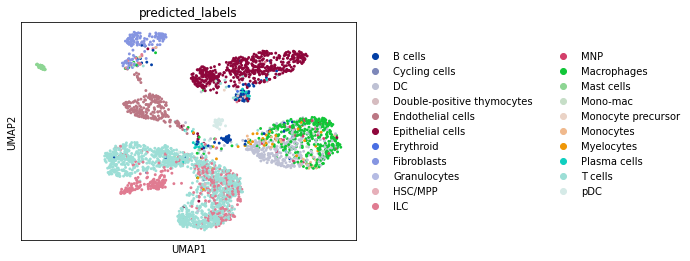

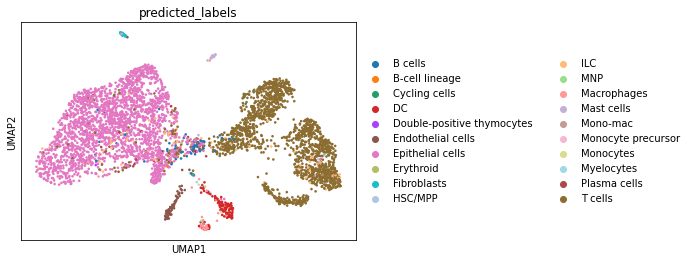

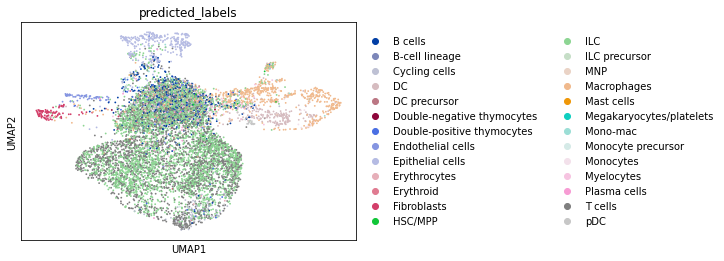

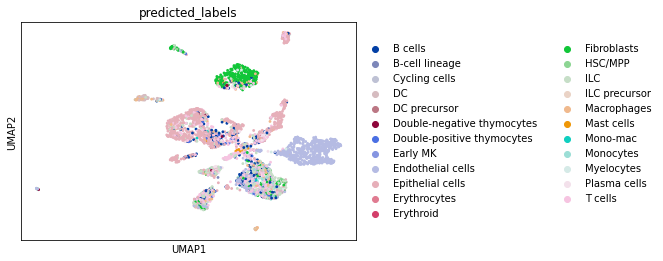

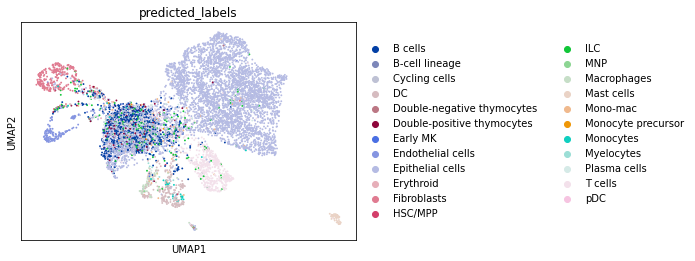

In [10]:
for dset in dataset_list:
    sc.pl.umap(dset, color='predicted_labels')

In [19]:
import scanpy as sc

# Preprocessing: Normalize and filter genes with low variance
for key, adata in datasets.items():
    sc.pp.filter_genes(adata, min_counts=10)  # Filter low-expression genes
    sc.pp.normalize_total(adata, target_sum=1e4)  # Normalize per sample
    sc.pp.log1p(adata)  # Log transformation for RNA-seq data
    sc.pp.highly_variable_genes(adata, min_mean=0.1, max_mean=10, min_disp=0.5)  # Feature selection

filtered out 6295 genes that are detected in less than 10 counts
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes


NumExpr defaulting to 8 threads.


    finished (0:00:03)
filtered out 6981 genes that are detected in less than 10 counts
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:02)
filtered out 6464 genes that are detected in less than 10 counts
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
filtered out 6794 genes that are detected in less than 10 counts
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
filtered out 6554 genes that are detected in less than 10 counts
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:01)
filtered out 6270 genes that are detected in less than 10 counts
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:02)
filtered out 6694 genes that are detected in less than 10 counts
normalizing counts per cell
    finished (0:00:00)
e

In [21]:
features = adata.X  # Use .X directly for gene expression data
labels = adata.obs['MF_status']  # Outcome of interest, e.g., MF classification

KeyError: 'MF_status'

In [20]:
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame of features and labels
features = adata.raw.X  # Gene expression data
labels = adata.obs['MF_status']  # Outcome of interest, e.g., MF classification

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


AttributeError: 'NoneType' object has no attribute 'X'

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature importance to identify potential biomarkers
importances = rf_model.feature_importances_
important_features = sorted(zip(adata.var_names, importances), key=lambda x: x[1], reverse=True)
print("Top 10 important features (genes):", important_features[:10])


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
cv_scores = cross_val_score(rf_model, features, labels, cv=5)
print("Cross-validation scores:", cv_scores)


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)


In [12]:
# import anndata as ad
# import os
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler


# # Print summary of datasets loaded
# for key, data in datasets.items():
#     print(f"{key}: {data.shape}")

# # Example: Let's assume you want to generate a heatmap for one of the datasets
# # Assuming the dataset of interest is the first one (you can loop through all if needed)
# dataset = datasets[list(datasets.keys())[0]]  # Replace with specific dataset if required

# # Check the available columns in the `obs` dataframe
# print(dataset.obs.columns)

In [13]:
# # Select the top N most variable genes
# n_top_genes = 10  # You can adjust this number
# variability = expression_df.var(axis=0)  # Variance across samples for each gene
# top_genes = variability.nlargest(n_top_genes).index  # Get the top N genes by variance

# # Subset the expression data to include only the top genes
# expression_df = expression_df[top_genes]

In [14]:
# from scipy.sparse import csr_matrix

# # If the expression data is dense, convert it to a sparse matrix
# if not isinstance(expression_data, csr_matrix):
#     expression_data = csr_matrix(expression_data)

# # Convert the sparse matrix to a pandas DataFrame
# expression_df = pd.DataFrame(expression_data.toarray(), columns=dataset.var_names)

In [15]:
# # Scale the expression data
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(expression_df.T)  # Transpose to scale genes (rows)

# # Create the heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(scaled_data, cmap="viridis", annot=False, xticklabels=top_genes, yticklabels=cluster_labels[:1000])  # Subset for speed
# plt.title("Heatmap of Scaled Gene Expression for Clusters")
# plt.xlabel("Genes")
# plt.ylabel("Clusters")
# plt.show()

In [17]:
# import anndata as ad
# import os
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# from scipy.sparse import csr_matrix

# # Define the data folder path
# data_folder = '/Users/aziz/Untitled Folder/gaydosik_2019_data/gaydosik_2019_filtered'

# # List all .h5ad files in the directory
# h5ad_files = [f for f in os.listdir(data_folder) if f.endswith('.h5ad')]

# # Initialize an empty dictionary to hold datasets
# datasets = {}

# # Iterate over all .h5ad files and load them
# for file in h5ad_files:  # Use the previously defined `h5ad_files` list
#     file_path = os.path.join(data_folder, file)  # Construct the full path
#     datasets[file.replace('.h5ad', '')] = ad.read_h5ad(file_path)  # Store with name excluding '.h5ad'

# # Select one dataset (you can choose another dataset if needed)
# dataset = datasets[list(datasets.keys())[0]]  # Take the first dataset as an example

# # Extract gene expression data (X) and cluster labels
# expression_data = dataset.X  # This contains the gene expression data
# cluster_labels = dataset.obs['leiden']  # Assuming 'leiden' is the column for clusters in the metadata

# # Limit the number of genes and/or samples
# n_genes_to_use = 50  # Adjust as needed
# n_samples_to_use = 100  # Adjust as needed

# # Subset the expression data (samples and genes)
# expression_df = pd.DataFrame(expression_data[:n_samples_to_use, :n_genes_to_use], columns=dataset.var_names[:n_genes_to_use])

# # Sample the cluster labels for the same subset of samples
# cluster_labels = cluster_labels[:n_samples_to_use]

# # Example of limiting the number of genes (top 50 variable genes)
# n_top_genes = 50  # You can adjust this number
# variability = expression_df.var(axis=0)  # Variance across samples for each gene
# top_genes = variability.nlargest(n_top_genes).index  # Get the top N genes by variance
# expression_df = expression_df[top_genes]  # Subset to top genes

# # Scale the expression data
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(expression_df.T)  # Transpose to scale genes (rows)

# # Create the heatmap
# plt.figure(figsize=(10, 8))
# sns.heatmap(scaled_data, cmap="viridis", annot=False, xticklabels=top_genes, yticklabels=cluster_labels[:n_samples_to_use])  # Subset for speed
# plt.title("Heatmap of Scaled Gene Expression for Clusters")
# plt.xlabel("Genes")
# plt.ylabel("Clusters")
# plt.show()

In [18]:
# # Create the heatmap
# plt.figure(figsize=(20, 20))
# sns.heatmap(scaled_data, cmap="viridis", annot=False, xticklabels=top_genes, yticklabels=cluster_labels[:n_samples_to_use])  # Subset for speed
# plt.title("Heatmap of Scaled Gene Expression for Clusters")
# plt.xlabel("Genes")
# plt.ylabel("Clusters")
# plt.show()

In [23]:
# import anndata as ad
# import os
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler

# # Assuming you have loaded your dataset
# # Define the data folder path
# data_folder = '/Users/aziz/Untitled Folder/gaydosik_2019_data/gaydosik_2019_filtered'

# # List all .h5ad files in the directory
# h5ad_files = [f for f in os.listdir(data_folder) if f.endswith('.h5ad')]

# # Initialize an empty dictionary to hold datasets
# datasets = {}

# # Iterate over all .h5ad files and load them
# for file in h5ad_files:
#     file_path = os.path.join(data_folder, file)
#     datasets[file.replace('.h5ad', '')] = ad.read_h5ad(file_path)

# # Select one dataset (you can choose another dataset if needed)
# dataset = datasets[list(datasets.keys())[0]]  # Take the first dataset as an example

# # Extract tSNE coordinates
# tsne_1 = dataset.obsm['X_tsne'][:, 0]  # tSNE-1 (first component)
# tsne_2 = dataset.obsm['X_tsne'][:, 1]  # tSNE-2 (second component)

# # Genes of interest
# genes_of_interest = ['HC-1', 'HC-2', 'HC-3', 'HC-4', 'CTCL-2', 'CTCL-5', 'CTCL-6', 'CTCL-8', 'CTCL-12']

# # Extract the expression data for genes of interest
# expression_data = dataset.raw[:, genes_of_interest].X  # Assuming data is stored in raw attribute
# expression_df = pd.DataFrame(expression_data, columns=genes_of_interest)

# # Normalize expression data (optional, but can make the plot more interpretable)
# expression_df = (expression_df - expression_df.mean()) / expression_df.std()

# # Plot UMAP with tSNE components as axes
# plt.figure(figsize=(10, 8))

# # Scatter plot for tSNE-1 vs. tSNE-2
# sns.scatterplot(x=tsne_1, y=tsne_2, hue=expression_df['HC-1'], palette='viridis', size=expression_df['HC-1'], sizes=(50, 200), legend=False)

# # Customize the plot
# plt.title('UMAP with tSNE-1 and tSNE-2')
# plt.xlabel('tSNE-1')
# plt.ylabel('tSNE-2')

# plt.show()

In [24]:
# # Extract UMAP data from the dataset
# umap1 = dataset.obsm['X_umap'][:, 0]  # UMAP-1
# umap2 = dataset.obsm['X_umap'][:, 1]  # UMAP-2

# # Define genes of interest
# genes_of_interest = ['HC-1', 'HC-2', 'HC-3', 'HC-4', 'CTCL-2', 'CTCL-5', 'CTCL-6', 'CTCL-8', 'CTCL-12']

# # Extract expression data for the genes of interest
# expression_of_interest = dataset[:, genes_of_interest].X

# # If the expression data is sparse, convert to dense format
# if isinstance(expression_of_interest, ad.AnnData.X.__class__):
#     expression_of_interest = expression_of_interest.toarray()

# # Create a DataFrame for easier manipulation
# expression_df = pd.DataFrame(expression_of_interest, columns=genes_of_interest)

# # Plot t-SNE (or UMAP) with gene expression
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x=umap1, y=umap2, hue=expression_df['HC-1'], palette='viridis', legend=None)
# plt.title("UMAP with Expression of HC-1 Gene")
# plt.xlabel("UMAP-1")
# plt.ylabel("UMAP-2")
# plt.show()


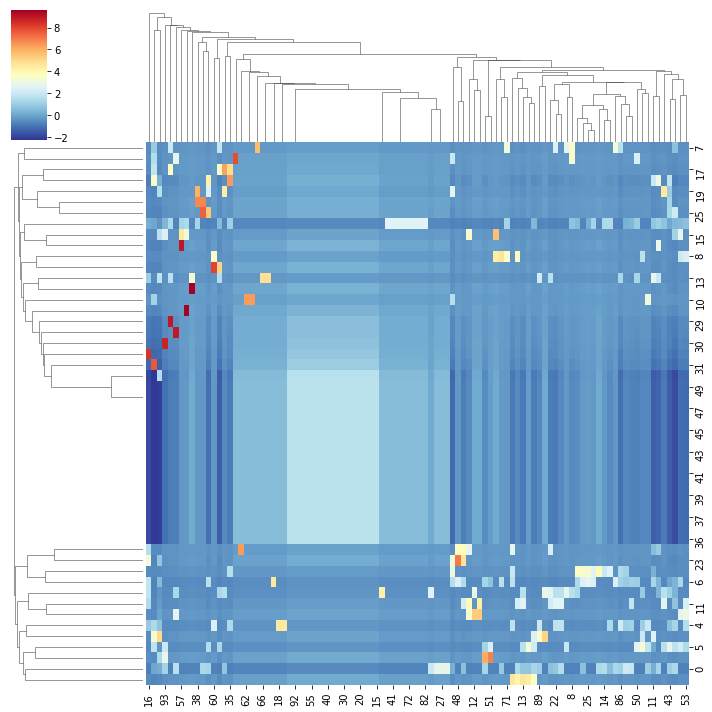

In [26]:
sns.clustermap(scaled_data, z_score=0, cmap = 'RdYlBu_r')